In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
#reading the csv and stoing as a dataframe
df = pd.read_csv('data/StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
#checking number of null values of the dataset
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
#checking information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
#checking unique values from each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
#checking stats of the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights from the raw dataset
- The mean value is almost similar for three different columns as well as std
however, the min value is 0 for math and 17 and 10 for reading and writing respectively.
- here q1s are 57, 59, 57.75
  and q3s are 77, 79, 79

In [11]:
#define numerical & categorical columns 
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [12]:
#Adding columns for total score and average
df['Total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average_score'] = df['Total_score'] / 3

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading score'] == 100]['Average_score'].count()
writing_full = df[df['writing score'] == 100]['Average_score'].count()
math_full = df[df['math score'] == 100]['math score'].count()

In [15]:
print(f'Number of students with full marks in reading : {reading_full}')
print(f'Number of students with full marks in writing : {writing_full}')
print(f'Number of students with full marks in math : {math_full}')

Number of students with full marks in reading : 17
Number of students with full marks in writing : 14
Number of students with full marks in math : 7


In [16]:
reading_less_20 = df[df['reading score'] < 20]['Average_score'].count()
writing_less_20 = df[df['writing score'] < 20]['Average_score'].count()
math_less_20 = df[df['math score'] < 20]['math score'].count()

In [17]:
print(f'Number of students with less than 20 in reading : {reading_less_20}')
print(f'Number of students with less than 20 in writing : {writing_less_20}')
print(f'Number of students with less than 20 in math : {math_less_20}')

Number of students with less than 20 in reading : 1
Number of students with less than 20 in writing : 3
Number of students with less than 20 in math : 4


# 4 Exploring Data (Visualization)
## 4.1 Visualize average score distribution to make some conclusion
- Histogram
- Kernel Distribution Funtion (KDE)

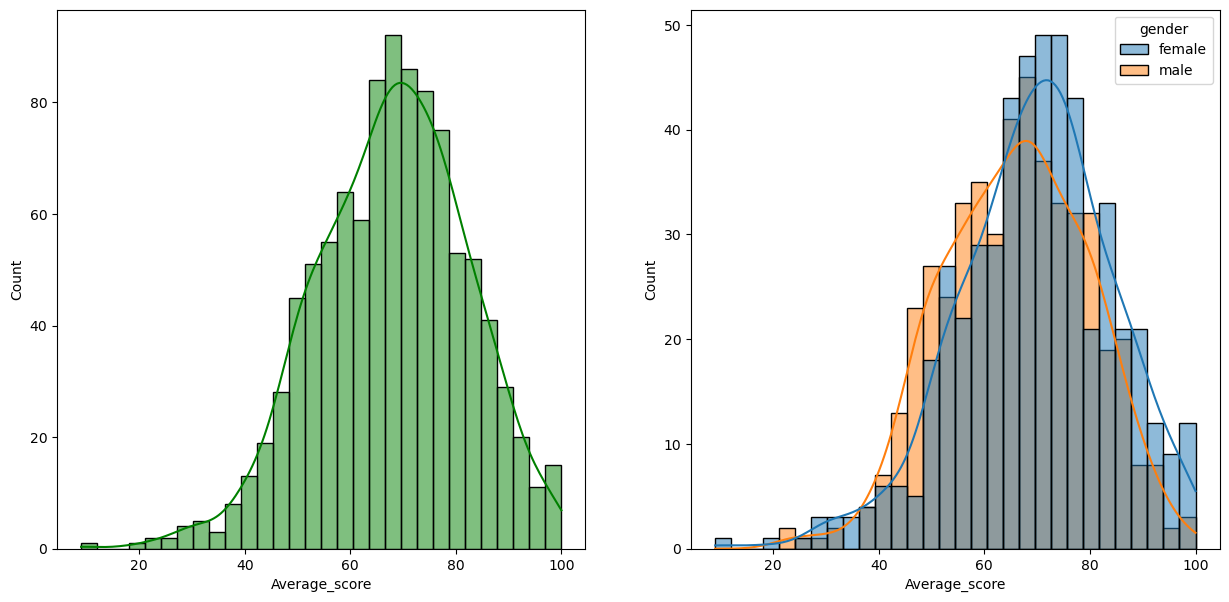

In [18]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'Average_score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'Average_score', bins = 30, kde = True, hue = 'gender')
plt.show()

## Females are tend to perform well than male students 

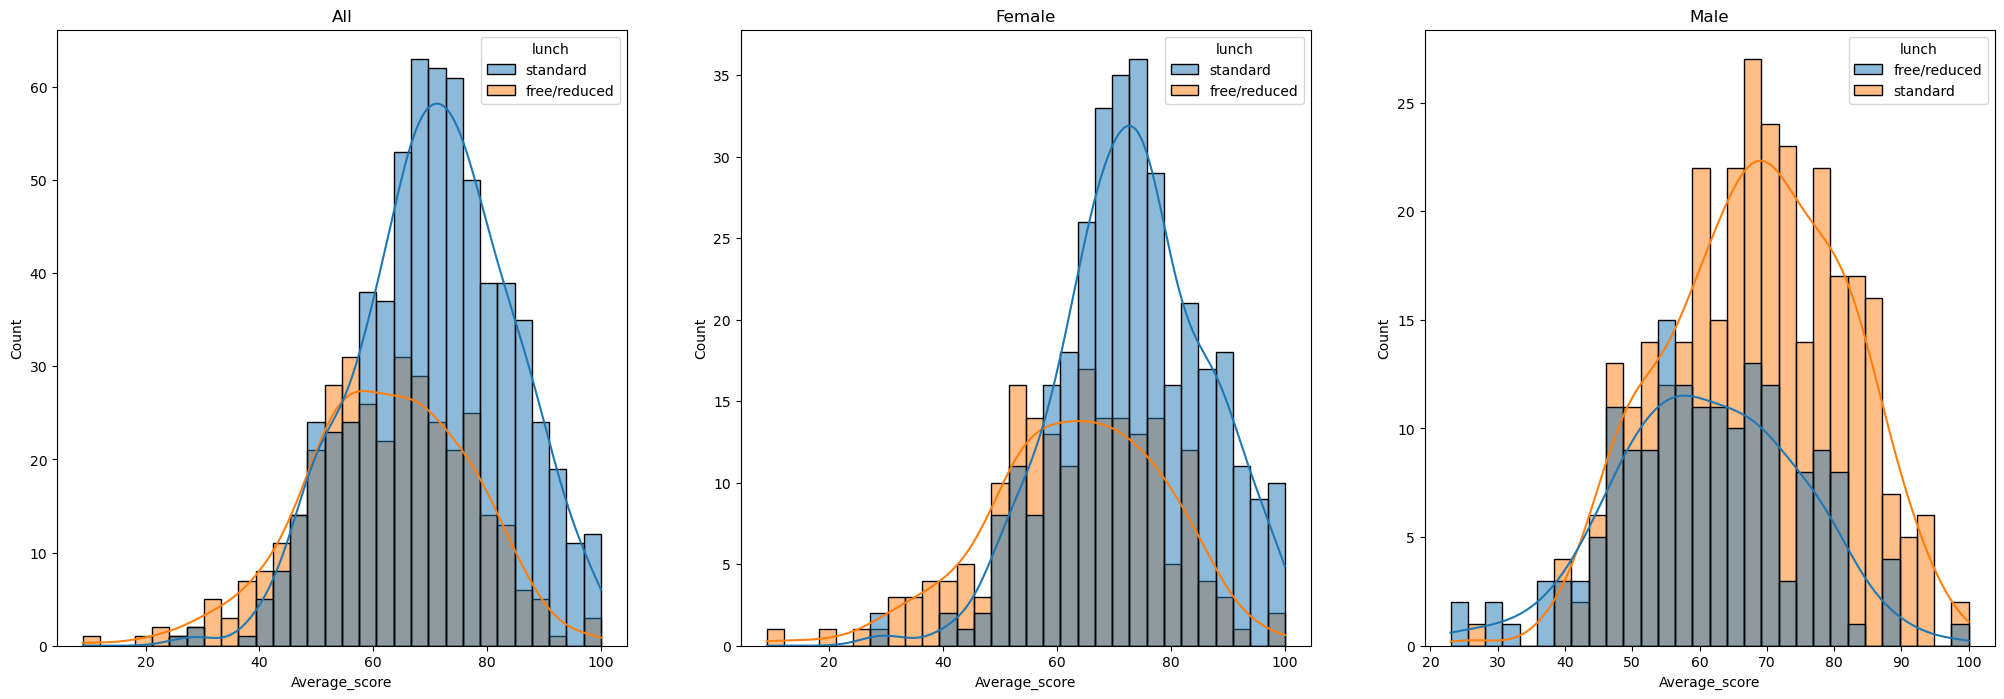

In [19]:
plt.figure(figsize = (25, 8))
plt.subplot(131)
sns.histplot(data = df, x = 'Average_score', bins = 30, kde = True, hue = 'lunch')
plt.title('All')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'], bins = 30, x = 'Average_score', kde = True, hue = 'lunch')
plt.title('Female')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'], bins = 30, x = 'Average_score', kde = True, hue = 'lunch')
plt.title('Male')
plt.show()

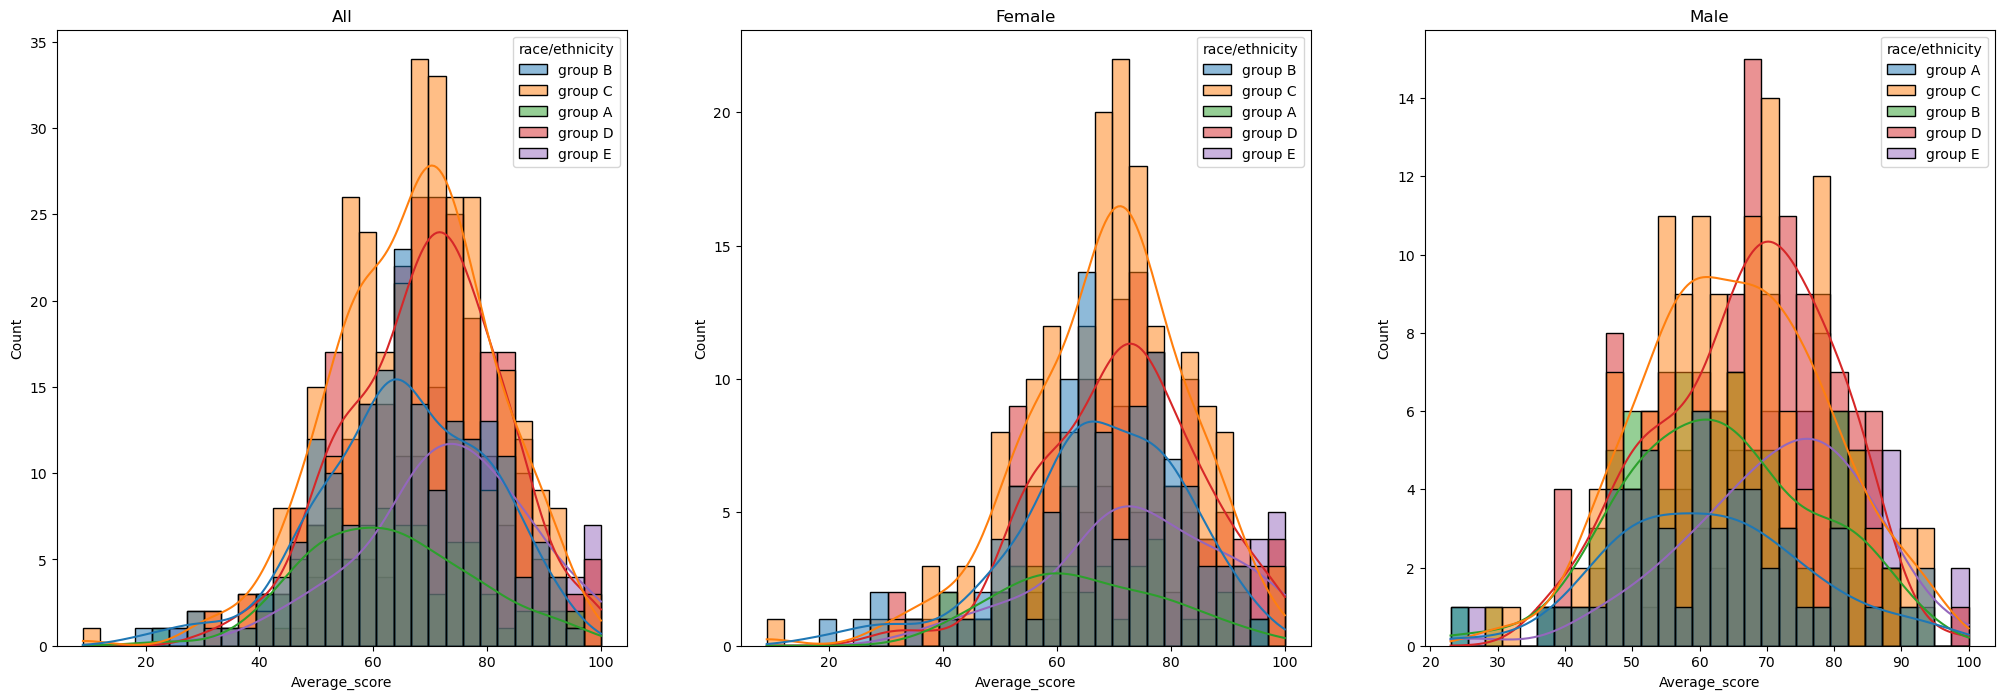

In [20]:
plt.figure(figsize = (25, 8))
plt.subplot(131)
sns.histplot(data = df, x = 'Average_score', bins = 30, kde = True, hue = 'race/ethnicity')
plt.title('All')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'], bins = 30, x = 'Average_score', kde = True, hue = 'race/ethnicity')
plt.title('Female')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'], bins = 30, x = 'Average_score', kde = True, hue = 'race/ethnicity')
plt.title('Male')
plt.show()

## Insight 
- Students from group A and B tends to perform poorly in the exam for both male and female students

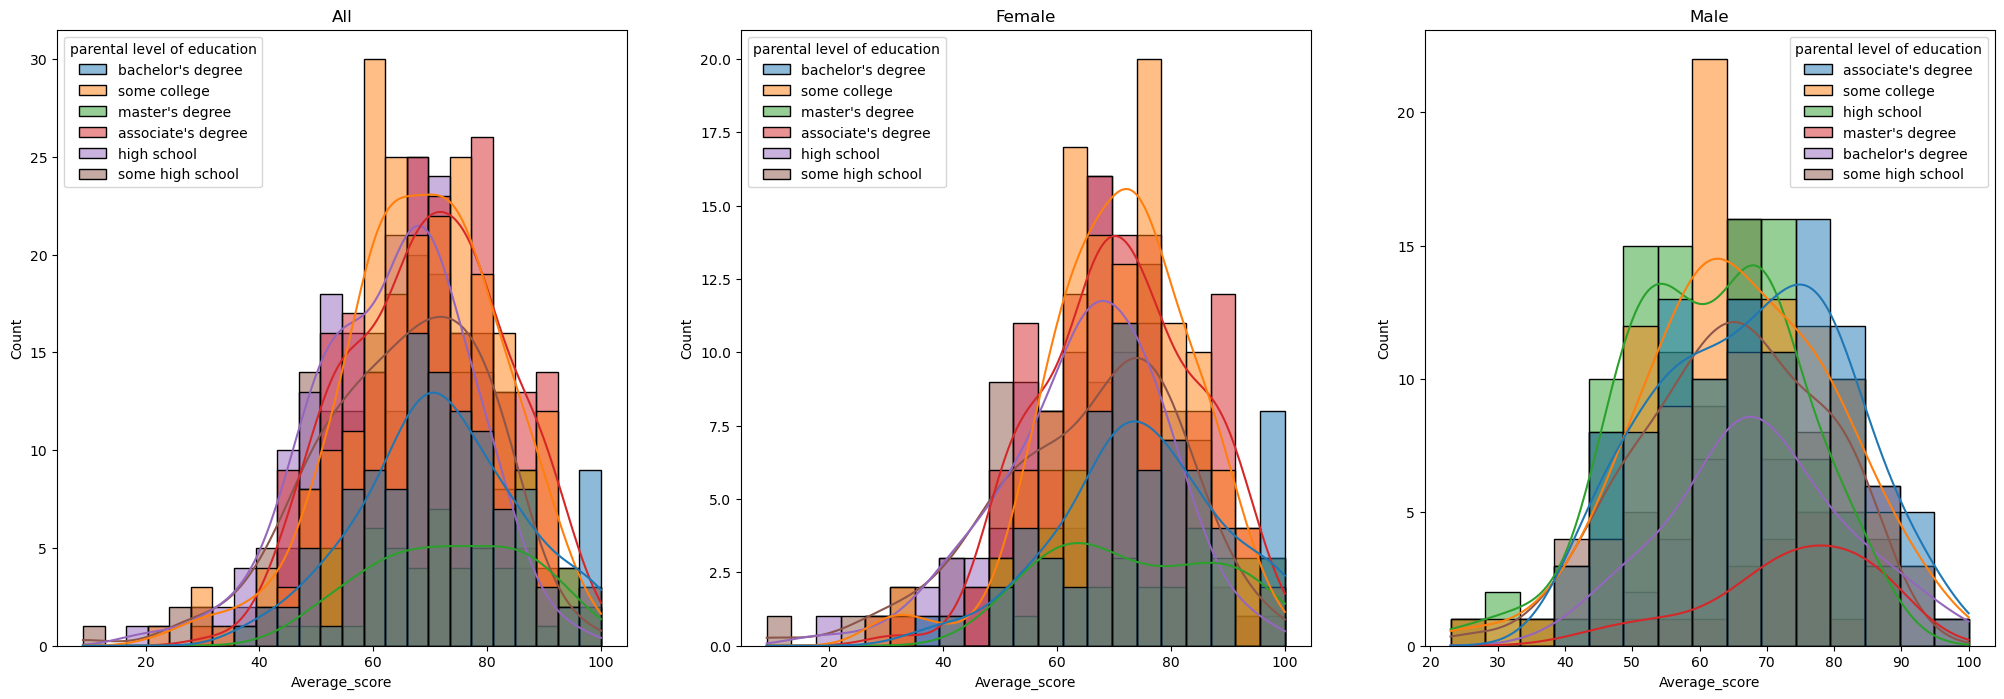

In [21]:
plt.figure(figsize = (25, 8))
plt.subplot(131)
sns.histplot(data = df, x = 'Average_score', kde = True, hue = 'parental level of education')
plt.title('All')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'], x = 'Average_score', kde = True, hue = 'parental level of education')
plt.title('Female')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'], x = 'Average_score', kde = True, hue = 'parental level of education')
plt.title('Male')
plt.show()

# Insight
- In plot 1,2,3 parents with some college degree, associate degree and master's degree their child tend to perform 
doing well in the exam

## 4.2 Maximum score of students in all three subjects

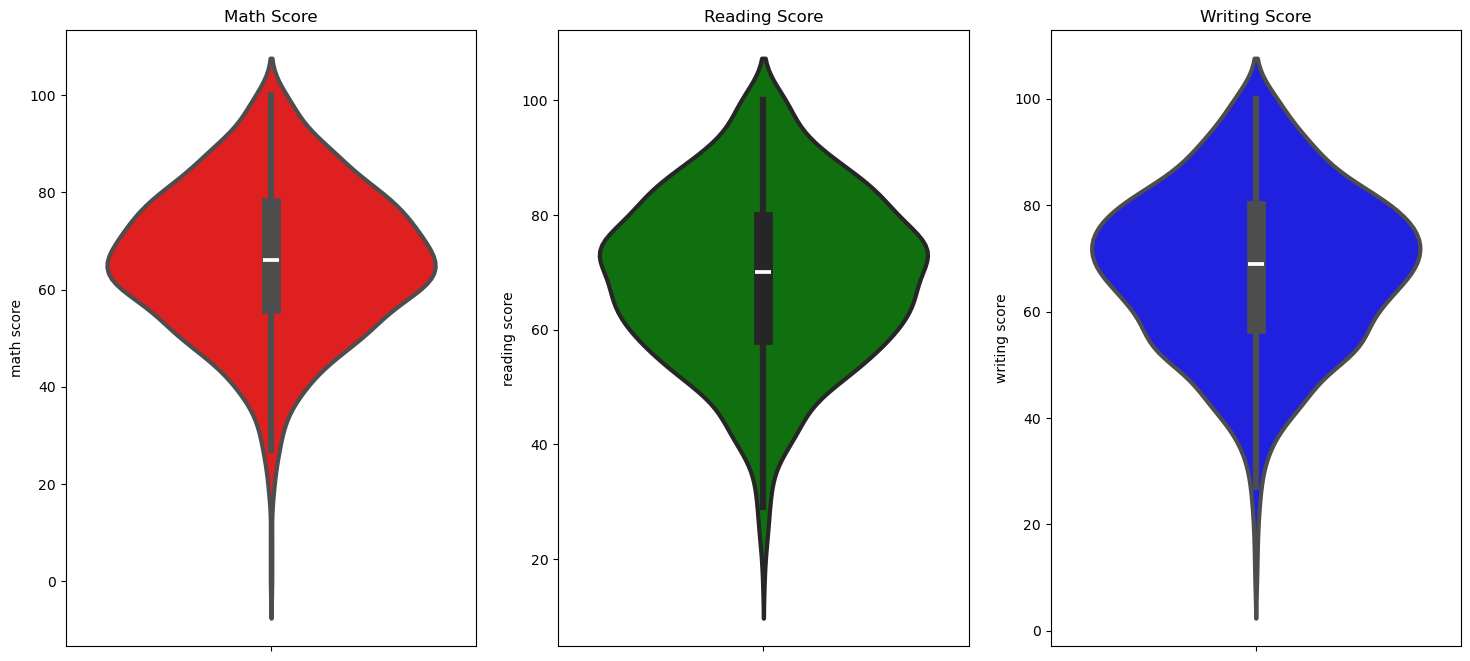

In [22]:
plt.figure(figsize = (18, 8))
plt.subplot(1,3,1)
plt.title('Math Score')
sns.violinplot(y = 'math score', data = df, color = 'red', linewidth = 3)
plt.subplot(1,3,2)
plt.title('Reading Score')
sns.violinplot(y = 'reading score', data = df, color = 'green', linewidth = 3)
plt.subplot(1,3,3)
plt.title('Writing Score')
sns.violinplot(y = 'writing score', data = df, color = 'blue', linewidth = 3)
plt.show()

### Insights
- From the plot above we can see that the students average marks from all the three subjects are 60 - 80
- They performed well in reading and writing than math

## 4.3 Multivariate analysis using pieplot

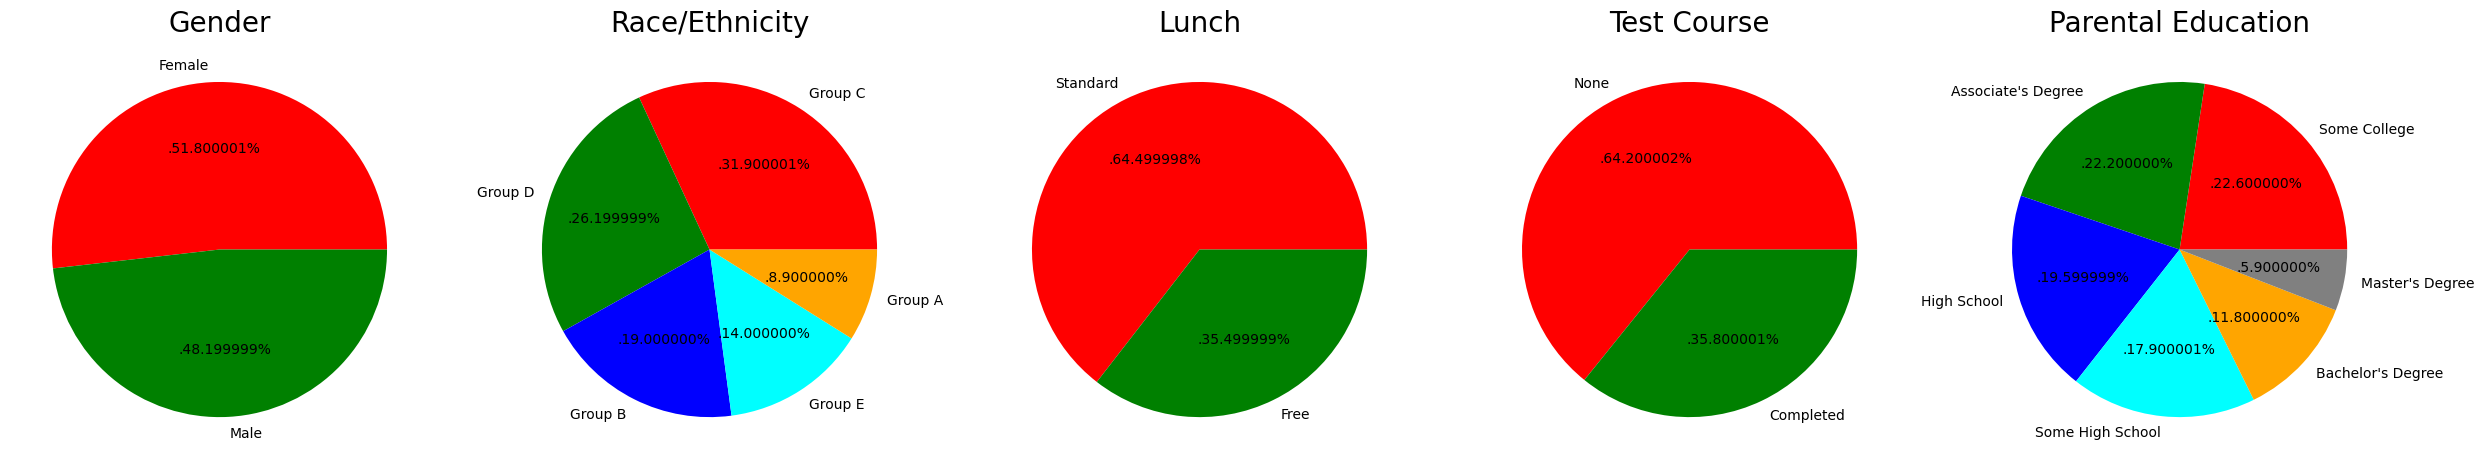

In [23]:
plt.rcParams['figure.figsize'] = (25, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

## Insights
1. Number of male and female students are almost same.
2. Group C is bigger than any other group.
3. Almost 65% students have standard lunch.
4. Most of the students haven't completed the test course.
5. Number of students whose education is "Some college" is greater followed by "Associate degree"

## 4.4 Feature wise visualization 
### 4.4.1 Gender Column 
- How is distribution of Gender?
- Is gender has any impact on student's performance?

## How Gender is distributed!

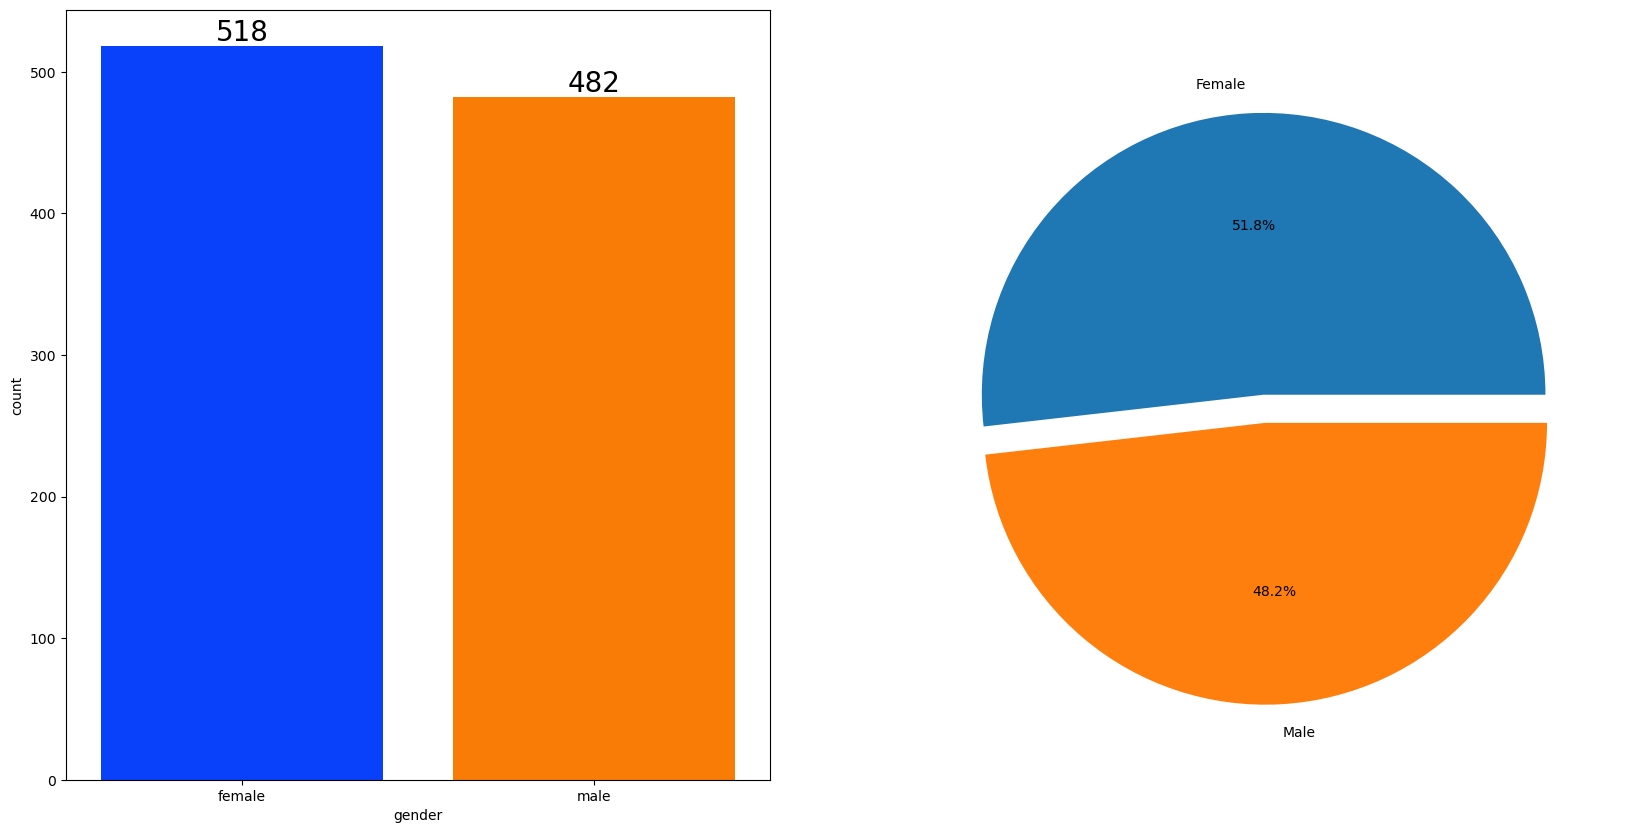

In [29]:
f,ax = plt.subplots(1, 2, figsize= (20, 10))
sns.countplot(x = df['gender'], data = df, palette = 'bright', ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['gender'].value_counts(), labels = ['Female','Male'], explode=[0, 0.1], autopct = '%1.1f%%')
plt.show()

### Insight
- Gender has balanced data with female students are 518(52%) and male students are 482(48%)

## Is gender has any impact on student's performance!

In [33]:
gender_group = df.groupby('gender').mean()
gender_group

TypeError: agg function failed [how->mean,dtype->object]